# __Pipeline 2:__
## _IQR --> Min Max --> Normalization_

## Importing Data:

In [2251]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [2252]:
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [2253]:
compdata_original.shape
# 682 rows and 22 columns

(682, 22)

In [2254]:
compdata_original.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [2255]:
compdata_original.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

In [2256]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [2257]:
# Create a copy of the data
compdata = compdata_original.copy()

# Variable Calculations:

In [2258]:
# Impute the rows T2 values!!!! mean
# Cannot do calculations with missing data on the number of words, the ratios will be 0 and create outliers

compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0


In [2259]:
compdata.loc[125,'T2']=compdata['T2'].mean()

In [2260]:
compdata.loc[199,'T2']=compdata['T2'].mean()

In [2261]:
# check for negatives
# cannot have a negative number of long words (T5)

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.55,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0


In [2262]:
compdata.loc[7,'T5']=compdata['T5'].mean()

In [2263]:
# cannot have a negative number of positive words (S1)
compdata.loc[compdata['S1'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,1.0,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,-1.0,97.0,134.0


In [2264]:
# Fill the 0, negative, and infinite values with the mean for continuous values
compdata.loc[134,'S1']=compdata['S1'].mean()

In [2265]:
compdata["S1"] = pd.to_numeric(compdata["S1"])

In [2266]:
# Ratios:

    # ** How to find the ratio for T1 and T2... impute them

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing Data:

In [2267]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 34 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
T3_        681 non-null float64
T4_        681 non-null float64
T5_        681 non-null float64
S1_        681 non-null float64
S2_        681 non-null float64
S3_        681 non-null float64
P(

In [2268]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [2269]:
# what is the percentage of missing data in each column
compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1          0.00
I2          0.00
I3          1.17
P(IPO)      0.73
P(H)        1.47
P(L)        1.47
P(1Day)     3.23
C1          3.23
C2          3.23
C3          5.28
C4          3.23
C5          0.88
C6          0.88
C7         10.56
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
T3_         0.15
T4_         0.15
T5_         0.15
S1_         0.15
S2_         0.15
S3_         0.15
P(mid)      1.47
C3_         0.00
C5_         0.88
C6_         0.00
Y1          0.00
Y2          0.00
dtype: float64

In [2270]:
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,0.059655,0.004513,0.00798,0.010793,17.0,1,3.540441,5.882353,0,1


In [2271]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,0.050882,0.005922,0.011482,0.00846,15.0,1,3.410759,13.333333,0,1


In [2272]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,0.056527,0.006539,0.00874,0.014273,14.0,0,3.81107,14.285714,0,1


In [2273]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,0.04157,0.0042,0.008835,0.00956,8.0,1,1.666667,0.0,1,1


In [2274]:
compdata.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [2275]:
compdata.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [2276]:
compdata.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [2277]:
compdata.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [2278]:
compdata.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [2279]:
compdata["I3"] = pd.to_numeric(compdata["I3"])

In [2280]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column I3_bins in the dataframe

compdata['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  

compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,I3_bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,5.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,5.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,5.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,5.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,6.0


In [2281]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
I3_bins     8
dtype: int64

In [2282]:
# Since C2 is a binary value, we will fill the missing data with the mode

compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,I3_bins,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,5.0,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,5.0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,5.0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,5.0,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,6.0,1.0


In [2283]:
compdata['Imputed_C7'] = compdata['C7'].fillna(compdata['C7'].mean())

In [2284]:
compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
P(mid)        10
C3_            0
C5_            6
C6_            0
Y1             0
Y2             0
I3_bins        8
Imputed_C2     0
Imputed_C7     0
dtype: int64

In [2285]:
# Drop missing P Values from Continues DF

compdata = compdata.dropna(subset=['P(1Day)'], axis=0, how='any')

In [2286]:
compdata.reset_index(drop=True, inplace=True)
compdata.tail(20)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,I3_bins,Imputed_C2,Imputed_C7
640,WMG,Warner Music Group Corp.,7929.0,17.0,24.0,22.0,16.400000,61.0,1.0,-6.43,...,0.010191,23.0,0,4.553691,0.000000,1,0,10.0,1.0,3436.000000
641,WNR,"Western Refining, Inc.",2911.0,17.0,17.0,15.0,18.590000,114.0,1.0,3.69,...,0.009553,16.0,1,2.953022,6.250000,0,1,5.0,1.0,3406.653000
642,WOLF,"Great Wolf Resorts, Inc.",7011.0,17.0,17.0,15.0,21.000000,125.0,1.0,-0.16,...,0.007206,16.0,0,2.011593,6.250000,0,1,10.0,1.0,47.824000
643,WSSI,"VISUAL SCIENCES, INC.",7372.0,8.5,9.0,8.0,9.040000,124.0,0.0,-0.86,...,0.011278,8.5,0,3.111096,0.000000,0,1,10.0,0.0,16.360000
644,WSTC,WEST CORP,7389.0,20.0,25.0,22.0,18.860001,1267.0,1.0,8.32,...,0.011594,23.5,1,3.921146,0.000000,1,0,10.0,1.0,820.665000
645,WTI,W&T OFFSHORE INC,1311.0,19.0,18.5,16.5,18.500000,270.0,1.0,2.82,...,0.012339,17.5,1,5.212790,8.571429,0,0,2.0,1.0,508.715000
646,XCYT,"Cyclacel Pharmaceuticals, Inc",2834.0,8.0,15.0,13.0,511.700000,158.0,0.0,-12.40,...,0.013140,14.0,0,3.517192,0.000000,1,1,5.0,0.0,0.170000
647,XGEN,XENOGEN CORP,2835.0,7.0,11.0,9.0,7.500000,105.0,1.0,-33.89,...,0.012745,10.0,0,3.494590,0.000000,1,1,5.0,1.0,20.063000
648,XPRT,LECG CORP,8742.0,17.0,16.0,14.0,21.030001,81.0,1.0,-1.41,...,0.011744,15.0,0,2.740591,13.333333,0,1,10.0,1.0,133.704000
649,XRM,XERIUM TECHNOLOGIES INC,2221.0,12.0,16.0,14.0,239.999940,389.0,1.0,-24.75,...,0.013076,15.0,0,3.269683,0.000000,1,1,5.0,1.0,586.794000


In [2287]:
# Create DF with only continuous features

# Drop the imputed variable colmuns
# Drop the P values
# Drop Y1 Y2 **make seperate df
    # Drop T1 and T2?

compdata_cont = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I1','I2','I3','T3','T1','T2','T4','T5','C3_','S1','S2','S3','C2','C3','C5','C6','C7','Imputed_C2','I3_bins','Y1','Y2'], axis=1)
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111,51.345
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,12.028832,0.000000,25.936
2,90.0,0.020715,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403,3.369134,0.000000,7.378
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319,3.299697,0.000000,8.526
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000,632.298


In [2288]:
compdata_cont.isna().sum()

C1            0
C4            0
T3_           0
T4_           0
T5_           0
S1_           0
S2_           0
S3_           0
C5_           0
C6_           0
Imputed_C7    0
dtype: int64

In [2289]:
compdata_cont.shape

(660, 11)

In [2290]:
# Create DF with only categorical features
# drop y1 y2 c2 i3
compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Y1','Y2','Imputed_C7'], axis=1)
compdata_cat.head(15)

,I1,I2,C3_,I3_bins,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,1,5.0,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,0,5.0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,0,5.0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,0,5.0,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,1,6.0,1.0
5,ACOM,Ancestry.com Inc.,1,10.0,1.0
6,ACOR,ACORDA THERAPEUTICS INC,0,5.0,1.0
7,ACRX,ACELRX PHARMACEUTICALS INC,0,5.0,0.0
8,ACTV,ACTIVE NETWORK INC,0,10.0,1.0
9,ACW,ACCURIDE CORP,1,5.0,1.0


In [2291]:
compdata_cat.shape

(660, 5)

In [2292]:
targetvals = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','I1','I2','C3_','I3_bins','Imputed_C2','Imputed_C7'], axis=1)
targetvals.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [2293]:
compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,149.728788,0.007282,0.891532,0.626720,0.052264,0.005318,0.009056,0.011516,4.417255,5.404645,506.358456
std,152.817467,0.033318,0.071892,0.077686,0.007075,0.001743,0.002991,0.002843,5.133537,10.877569,1583.637898
min,10.000000,-0.162352,0.000000,0.000000,0.031595,0.001602,0.002152,0.005326,0.283223,0.000000,0.074000
25%,85.000000,-0.013927,0.883417,0.580329,0.047562,0.004134,0.006966,0.009579,2.850622,0.000000,41.458000
50%,107.000000,0.009125,0.897294,0.628861,0.051943,0.005041,0.008577,0.011301,3.731035,0.000000,133.102000
75%,155.250000,0.031571,0.909693,0.674461,0.056544,0.006256,0.010521,0.012848,4.857904,7.692308,500.459962
max,2087.000000,0.092896,1.498982,0.826347,0.088960,0.012839,0.024605,0.029397,99.787255,100.000000,30683.000000


#### Run evaluation code now.. go back and check the results to see if it improved or not

##### after impute, after min max, after normalization

# Pipeline 2

## Interquartile Ratio:

In [2294]:
compdata.shape

(660, 37)

In [2295]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 

# only continuous df!!!

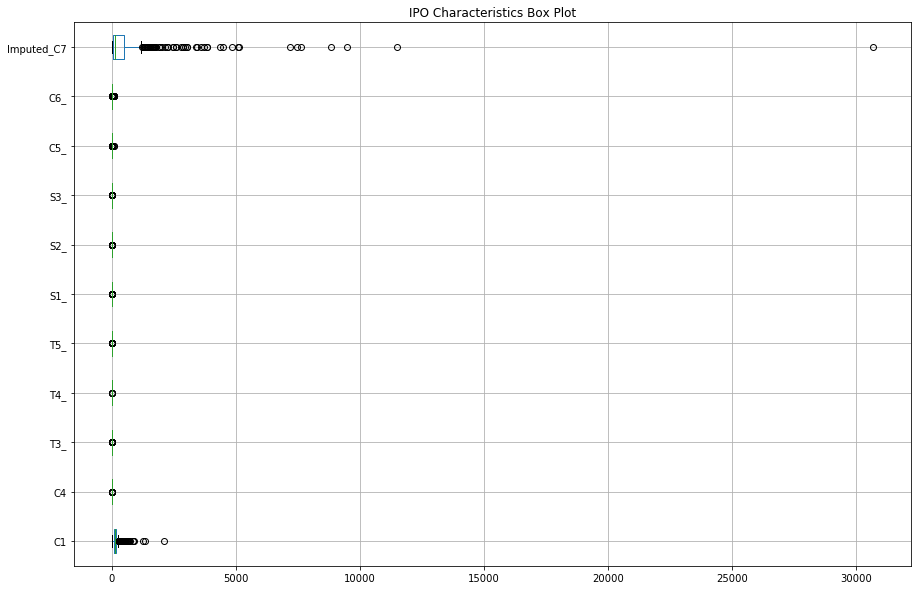

In [2296]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

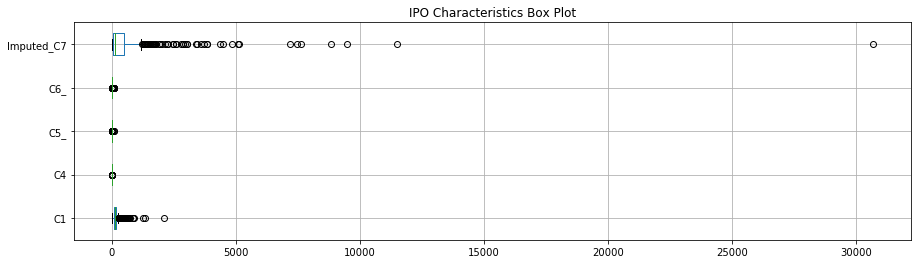

In [2297]:
compdata_cont.boxplot(column=['C1','C4','C5_','C6_','Imputed_C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

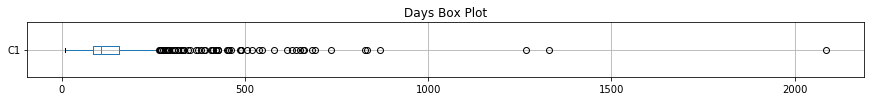

In [2298]:
compdata_cont.boxplot(column=['C1'],vert=False, figsize=(15,1))
plt.title('Days Box Plot')
plt.show()

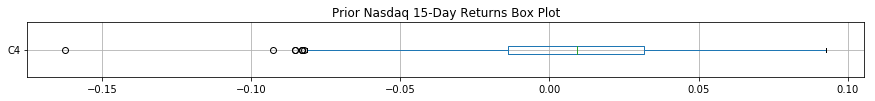

In [2299]:
compdata_cont.boxplot(column='C4',vert=False, figsize=(15,1))
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

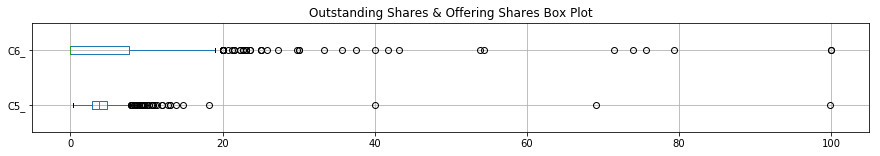

In [2300]:
compdata_cont.boxplot(column=['C5_','C6_'],vert=False, figsize=(15,2))
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

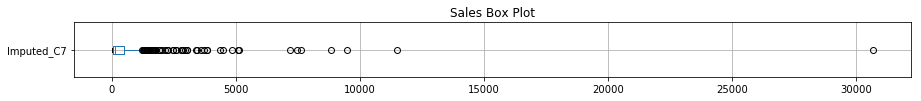

In [2301]:
# in millions of dollars

compdata_cont.boxplot(column='Imputed_C7',vert=False, figsize=(15,1))
plt.title('Sales Box Plot')
plt.show()

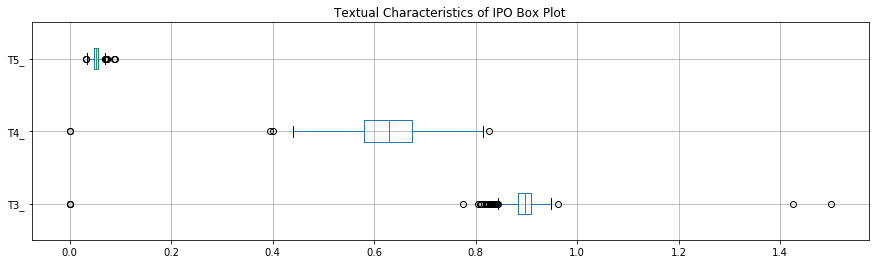

In [2302]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

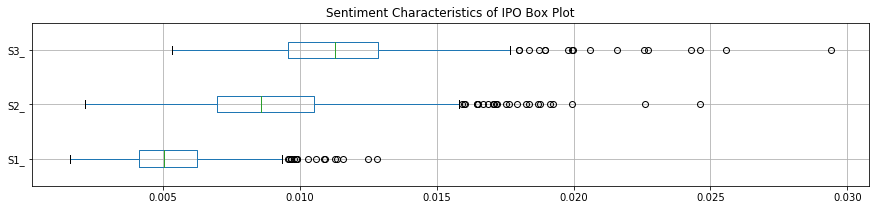

In [2303]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [2304]:
for col in compdata_cont.columns:
    u_bound = compdata_cont[col].quantile(0.75) + (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [2305]:
for col in compdata_cont.columns:
    l_bound = compdata_cont[col].quantile(0.25) - (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] < l_bound] = l_bound

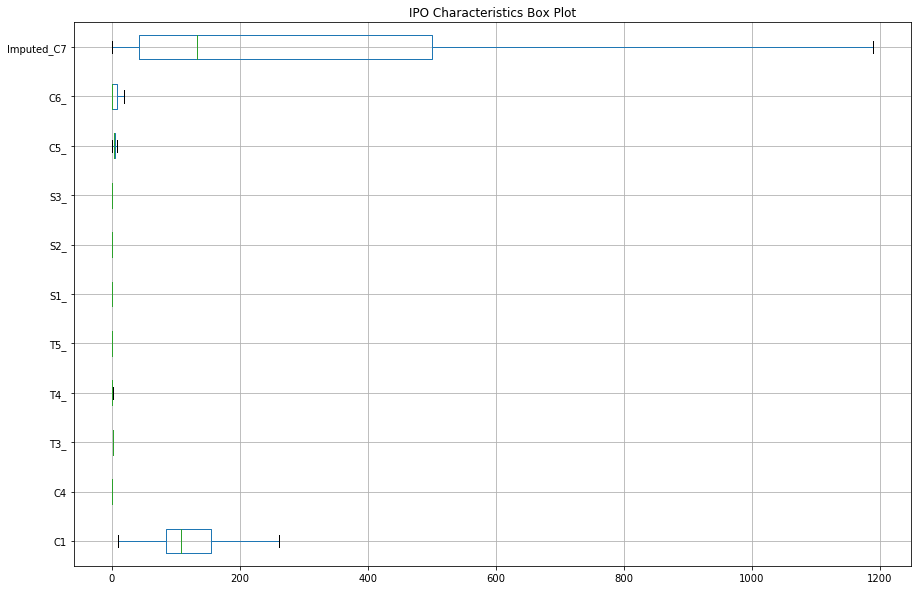

In [2306]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

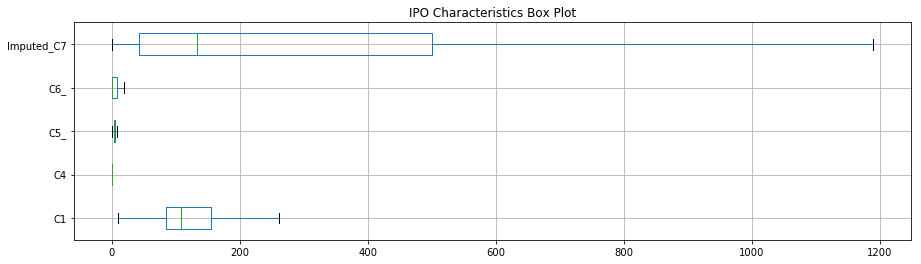

In [2307]:
compdata_cont.boxplot(column=['C1','C4','C5_','C6_','Imputed_C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

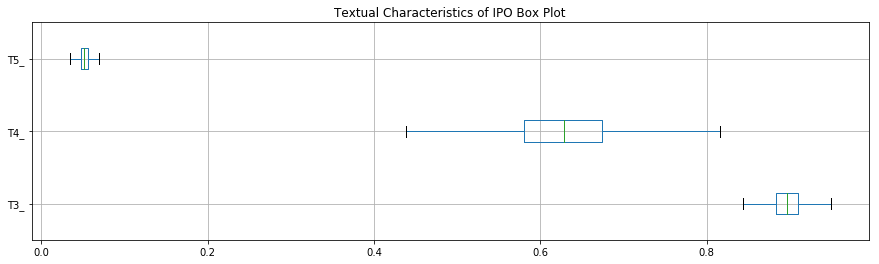

In [2308]:
compdata_cont.boxplot(column=['T3_','T4_','T5_'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

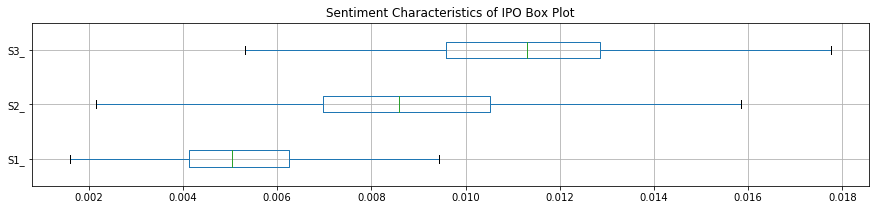

In [2309]:
compdata_cont.boxplot(column=['S1_','S2_','S3_'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

In [2310]:
compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,126.911932,0.007433,0.894481,0.628160,0.052204,0.005288,0.008977,0.011425,4.009806,4.363858,300.316300
std,64.094744,0.032757,0.021956,0.069922,0.006798,0.001651,0.002749,0.002522,1.647987,6.431440,359.192960
min,10.000000,-0.082174,0.844003,0.439132,0.034087,0.001602,0.002152,0.005326,0.283223,0.000000,0.074000
25%,85.000000,-0.013927,0.883417,0.580329,0.047562,0.004134,0.006966,0.009579,2.850622,0.000000,41.458000
50%,107.000000,0.009125,0.897294,0.628861,0.051943,0.005041,0.008577,0.011301,3.731035,0.000000,133.102000
75%,155.250000,0.031571,0.909693,0.674461,0.056544,0.006256,0.010521,0.012848,4.857904,7.692308,500.459962
max,260.625000,0.092896,0.949107,0.815658,0.070019,0.009440,0.015854,0.017752,7.868826,19.230769,1188.962906


#  Min Max

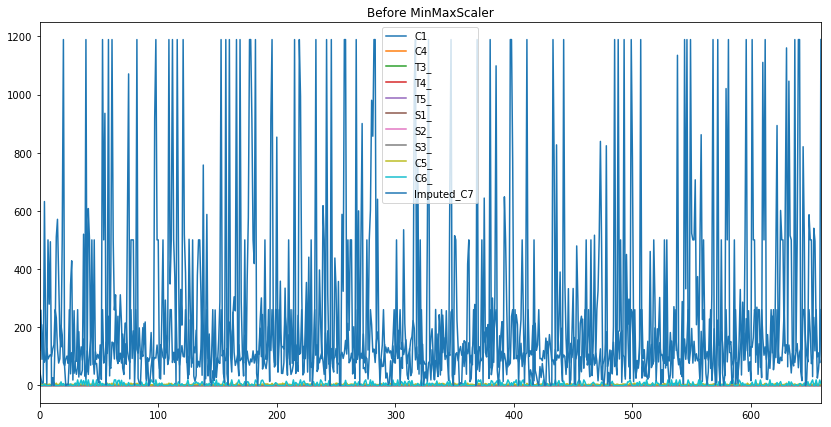

In [2311]:
compdata_cont.plot(figsize=(14,7))
plt.title('Before MinMaxScaler')
plt.show()

In [2312]:
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
compdata_cont = scaler.fit_transform(compdata_cont)
compdata_cont = pd.DataFrame(compdata_cont)

In [2313]:
compdata_cont.columns=['C1','C4','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Imputed_C7']

In [2314]:
compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.466482,0.511836,0.480269,0.502032,0.504195,0.470261,0.498137,0.490806,0.491270,0.226921,0.252540
std,0.255740,0.187110,0.208896,0.185703,0.189201,0.210688,0.200629,0.202996,0.217252,0.334435,0.302125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299252,0.389826,0.375000,0.375000,0.375000,0.323044,0.351299,0.342294,0.338457,0.000000,0.034809
50%,0.387032,0.521497,0.507031,0.503893,0.496929,0.438733,0.468926,0.480832,0.454520,0.000000,0.111893
75%,0.579551,0.649710,0.625000,0.625000,0.625000,0.593826,0.610780,0.605376,0.603074,0.400000,0.420885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


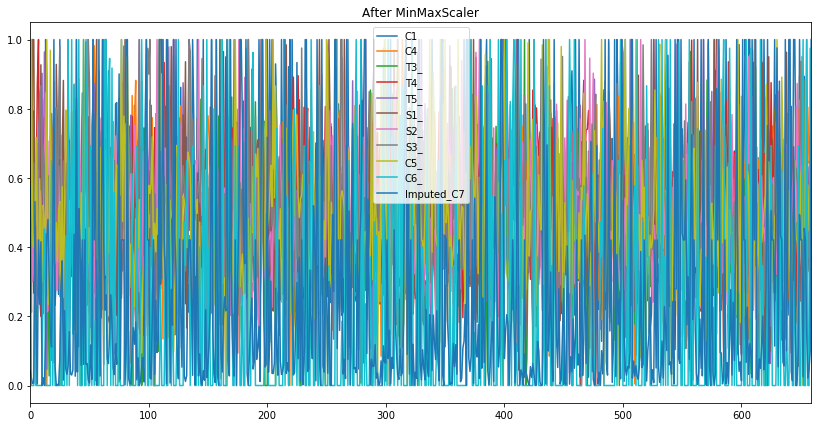

In [2315]:
compdata_cont.plot(figsize=(14,7))
plt.title('After MinMaxScaler')
plt.show()

## Skewness 

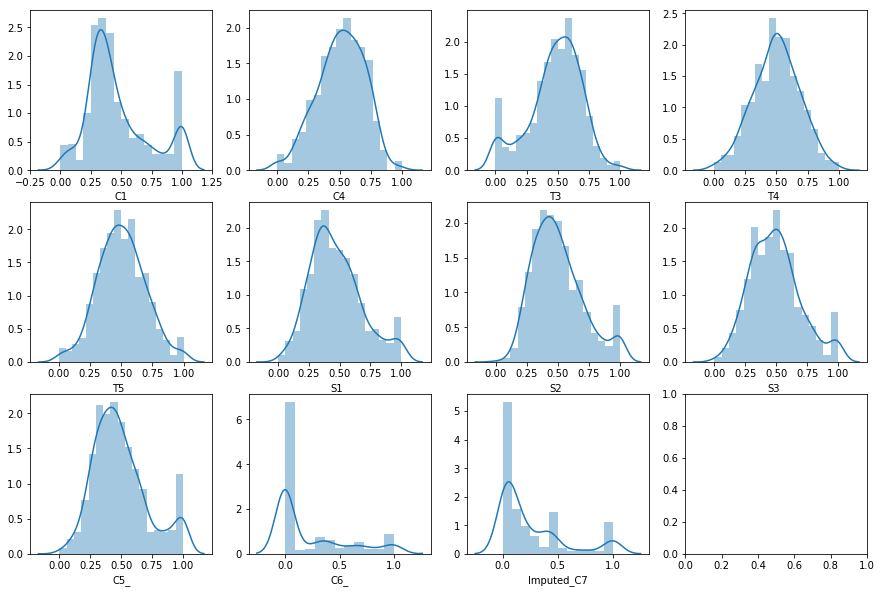

In [2316]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(3, 4, figsize=(15,10), sharex=False)
sns.distplot( compdata_cont["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont["T3_"] , ax=axes[0, 2])
sns.distplot( compdata_cont["T4_"] , ax=axes[0, 3])
sns.distplot( compdata_cont["T5_"] , ax=axes[1, 0])
sns.distplot( compdata_cont["S1_"] , ax=axes[1, 1])
sns.distplot( compdata_cont["S2_"] , ax=axes[1, 2])
sns.distplot( compdata_cont["S3_"] , ax=axes[1, 3])
sns.distplot( compdata_cont["C5_"] , ax=axes[2, 0])
sns.distplot( compdata_cont["C6_"] , ax=axes[2, 1])
sns.distplot( compdata_cont["Imputed_C7"] , ax=axes[2, 2])
plt.show()

In [2317]:
compdata_cont.skew()

# check if its left or right skewed
# close to 0 is normal (T4_).. [-.5 - .5]

# is any data good? (between -.5 and .5):
    # C4, T4_, T5_, S3_
    
# Positive Skew: --> log
    # C1, Imputed_C7, S1_, S2_, C5_, C6_
    
# Negative Skew: --> exponential
    # T3_

C1            0.836620
C4           -0.314465
T3_          -0.545971
T4_          -0.073967
T5_           0.110769
S1_           0.608468
S2_           0.694781
S3_           0.476608
C5_           0.724354
C6_           1.201653
Imputed_C7    1.437034
dtype: float64

In [2318]:
# Negative skew - T3_ 
compdata_cont['T3_'] = compdata_cont['C4'].apply(np.exp)
compdata_cont['T3_'].skew()

0.14770367279722382

In [2319]:
# Positive skew - C1 
compdata_cont['C1'] = compdata_cont['C1'].apply(np.sqrt)
compdata_cont['C1'].skew()

-0.005593781029685582

In [2320]:
# Positive skew - Imputed_C7 
compdata_cont['Imputed_C7'] = compdata_cont['Imputed_C7'].apply(np.sqrt)
compdata_cont['Imputed_C7'].skew()

0.6722657204306669

In [2321]:
compdata_cont['Imputed_C7'] = compdata_cont['Imputed_C7'].apply(np.sqrt)
compdata_cont['Imputed_C7'].skew()

0.015750652061081238

In [2322]:
# Positive skew - S1_
compdata_cont['S1_'] = compdata_cont['S1_'].apply(np.sqrt)
compdata_cont['S1_'].skew()

-0.11764053399760371

In [2323]:
# Positive skew - S2_
compdata_cont['S2_'] = compdata_cont['S2_'].apply(np.sqrt)
compdata_cont['S2_'].skew()

0.07649191618289627

In [2324]:
# Positive skew - C5_
compdata_cont['C5_'] = compdata_cont['C5_'].apply(np.sqrt)
compdata_cont['C5_'].skew()

-0.013406335058719068

In [2325]:
# Positive skew - C6_
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.cbrt)
compdata_cont['C6_'].skew()

0.48100774103954885

In [2326]:
# Positive skew - S3_
compdata_cont['S3_'] = compdata_cont['S3_'].apply(np.sqrt)
compdata_cont['S3_'].skew()

-0.2888659714388118

In [2327]:
# Negative skew - C4
compdata_cont['C4'] = compdata_cont['C4'].apply(np.exp)
compdata_cont['C4'].skew()

0.14770367279722382

In [2328]:
compdata_cont.skew()

C1           -0.005594
C4            0.147704
T3_           0.147704
T4_          -0.073967
T5_           0.110769
S1_          -0.117641
S2_           0.076492
S3_          -0.288866
C5_          -0.013406
C6_           0.481008
Imputed_C7    0.015751
dtype: float64

In [2329]:
# check for infinite numbers in df

# log all the values for the continues values *positives
# exponential for the negative continues values

# make it fit better into range after log and exponential (sqrt? log again?)

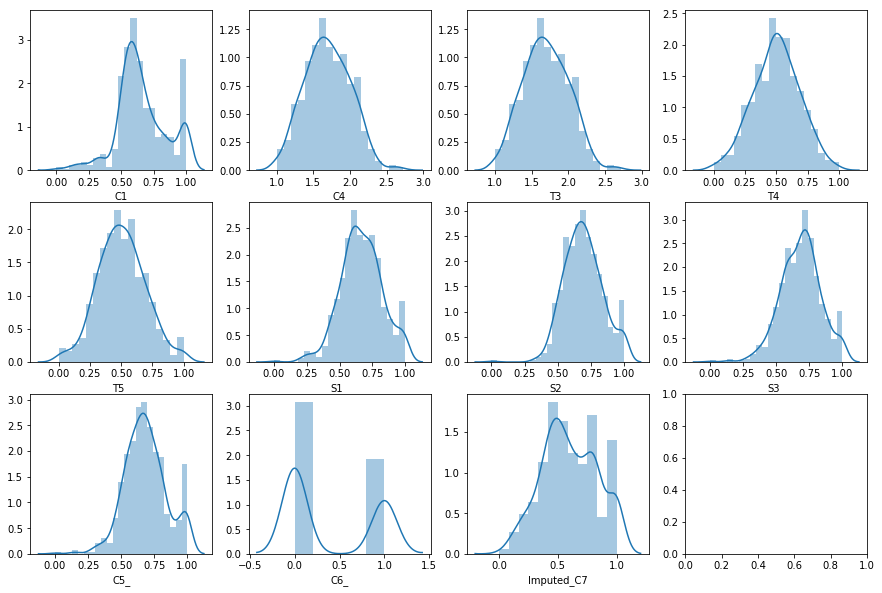

In [2330]:
f, axes = plt.subplots(3, 4, figsize=(15,10), sharex=False)
sns.distplot( compdata_cont["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont["T3_"] , ax=axes[0, 2])
sns.distplot( compdata_cont["T4_"] , ax=axes[0, 3])
sns.distplot( compdata_cont["T5_"] , ax=axes[1, 0])
sns.distplot( compdata_cont["S1_"] , ax=axes[1, 1])
sns.distplot( compdata_cont["S2_"] , ax=axes[1, 2])
sns.distplot( compdata_cont["S3_"] , ax=axes[1, 3])
sns.distplot( compdata_cont["C5_"] , ax=axes[2, 0])
sns.distplot( compdata_cont["C6_"] , ax=axes[2, 1])
sns.distplot( compdata_cont["Imputed_C7"] , ax=axes[2, 2])
plt.show()

In [2331]:
compdata_cont.shape

(660, 11)

## Correlation

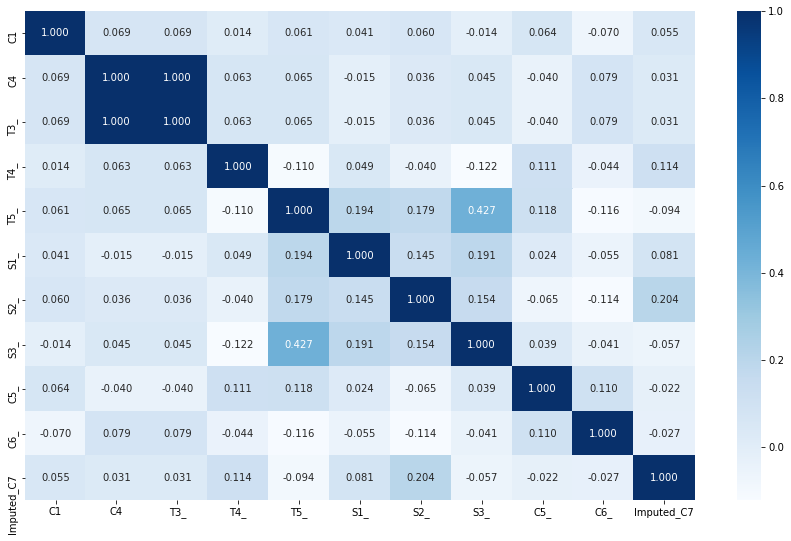

In [2332]:
#Create Correlation df
corr = compdata_cont.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.show()

- Highly Correlated:
    - C4 & T3_

In [2333]:
df = compdata_cont.drop('T3_',axis=1)
pipeline2_df1 = df.join([compdata_cat, targetvals])
pipeline2_df1.tail(20)

,C1,C4,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7,I1,I2,C3_,I3_bins,Imputed_C2,Y1,Y2
640,0.451100,1.894913,0.751077,0.558451,0.657347,0.998758,0.625724,0.750313,0.000000,1.000000,WMG,Warner Music Group Corp.,0,10.0,1.0,1,0
641,0.644176,1.797514,0.318945,0.427478,0.570977,0.615435,0.583273,0.593259,0.999829,1.000000,WNR,"Western Refining, Inc.",1,5.0,1.0,0,1
642,0.677387,2.050768,0.094683,0.357181,0.898324,0.612137,0.389010,0.477335,0.999829,0.447670,WOLF,"Great Wolf Resorts, Inc.",0,10.0,1.0,0,1
643,0.674435,1.614183,0.499951,0.683509,0.639949,0.753180,0.692116,0.610569,0.000000,0.342112,WSSI,"VISUAL SCIENCES, INC.",0,10.0,0.0,0,1
644,1.000000,1.762053,0.566513,0.489594,0.646497,0.791962,0.710251,0.692519,0.000000,0.911478,WSTC,WEST CORP,1,10.0,1.0,1,0
645,1.000000,1.397379,0.196114,0.588145,0.737342,0.755674,0.751273,0.806138,0.999877,0.808756,WTI,W&T OFFSHORE INC,1,2.0,1.0,0,0
646,0.768455,1.348098,0.414596,0.808832,0.495951,0.687542,0.792998,0.652939,0.000000,0.094794,XCYT,"Cyclacel Pharmaceuticals, Inc",0,5.0,0.0,1,1
647,0.615672,1.198375,0.234089,0.558070,0.474984,0.934370,0.772697,0.650654,0.000000,0.360091,XGEN,XENOGEN CORP,0,5.0,1.0,1,1
648,0.532252,2.223935,0.529750,0.454588,0.236942,0.521025,0.718669,0.569167,0.999944,0.579016,XPRT,LECG CORP,0,10.0,1.0,0,1
649,1.000000,1.768840,0.400132,0.631139,0.946046,0.908231,0.789770,0.627456,0.000000,0.838151,XRM,XERIUM TECHNOLOGIES INC,0,5.0,1.0,1,1


In [2334]:
pipeline2_df1.shape

(660, 17)

In [2335]:
pipeline2_df1.isna().sum()

C1            0
C4            0
T4_           0
T5_           0
S1_           0
S2_           0
S3_           0
C5_           0
C6_           0
Imputed_C7    0
I1            0
I2            0
C3_           0
I3_bins       0
Imputed_C2    0
Y1            0
Y2            0
dtype: int64

In [2336]:
compdata = compdata.dropna(subset=['P(1Day)'], axis=0)

In [2337]:
pipeline2_df1.to_csv('../project1-deadlinedemons/pipeline2_df1.csv', index=0)

In [1498]:
df2 = compdata_cont.drop('C4', axis=1)
pipeline2_df2 = df.join([compdata_cat, targetvals])
pipeline2_df2.head()

,C1,C4,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7,I1,I2,C3_,I3_bins,Imputed_C2,Y1,Y2
0,0.668493,1.887872,0.534607,0.561134,0.646157,0.717142,0.671479,0.687091,0.999916,0.455704,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,1.0,5.0,1.0,0.0,1.0
1,0.996753,1.481585,0.546102,0.481689,0.459629,0.808342,0.668296,1.000000,0.000000,0.384043,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,0.0,5.0,0.0,1.0,0.0
2,0.564980,1.799847,0.525021,0.770257,1.000000,0.548296,0.699306,0.637818,0.000000,0.279966,ACAD,ACADIA PHARMACEUTICALS INC,0.0,5.0,1.0,1.0,0.0
3,0.891075,1.792749,0.266919,0.766532,1.000000,0.603571,0.802028,0.630601,0.000000,0.290372,ACHN,ACHILLION PHARMACEUTICALS INC,0.0,5.0,1.0,1.0,1.0
4,0.528490,1.310041,0.393812,0.402516,0.609919,0.759087,0.691113,0.673715,0.999795,0.853950,ACLI,AMERICAN COMMERCIAL LINES INC.,1.0,6.0,1.0,0.0,1.0


In [82]:
# look for the ones over .5 or under -.5.. these are highly correlated ones
# flagging step

#every pair highly correlated need to be seperated into a different df

# make different dfs
    # 1 pair = 2
    # 2 pair = 4
    
# explain why theyre seperated

## do feature selection

# correlation is alwasy between -1 and 1

# merge all 3 parts together categorical back into .. categorical, contin (all the continues made.. not 1), target

# report all we did to change the data, not the data describing that we used to impute and change
# keep count of missing